# HW1104Q2 CH05Q08

### 8. We will now perform cross-validation on a simulated data set.

##### (a) Generate a simulated data set as follows: 
rng = np.random.default_rng(1)  
x = rng.normal(size=100)  
y = x - 2 * x**2 + rng.normal(size=100)   
##### In this data set, what is n and what is p? Write out the model used to generate the data in equation form.

In [1]:
import numpy as np
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = x - 2 * x**2 + rng.normal(size=100)

print("n=100, p=1")

n=100, p=1


##### (b) Create a scatterplot of X against Y . Comment on what you find.

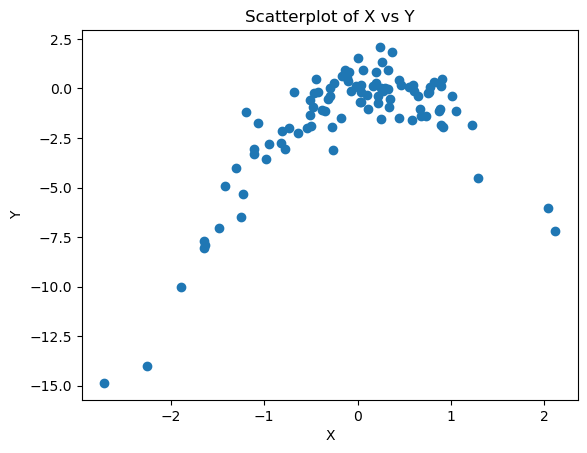

In [2]:
import matplotlib.pyplot as plt

plt.scatter(x, y)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatterplot of X vs Y")
plt.show()

##### (c) Set a random seed, and then compute the LOOCV errors that result from ftting the following four models using least squares: 
i. Y = β0 + β1X + e"  
ii. Y = β0 + β1X + β2X2 + e"  
iii. Y = β0 + β1X + β2X2 + β3X3 + e"  
iv. Y = β0 + β1X + β2X2 + β3X3 + β4X4 + e".  
##### Note you may find it helpful to use the data.frame() function to create a single data set containing both X and Y .

In [3]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LinearRegression

def loocv_error(x, y, degree):
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(x.reshape(-1, 1))
    loo = LeaveOneOut()
    errors = []
    
    for train_index, test_index in loo.split(X_poly):
        X_train, X_test = X_poly[train_index], X_poly[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        model = LinearRegression().fit(X_train, y_train)
        y_pred = model.predict(X_test)
        errors.append((y_test - y_pred) ** 2)
    
    return np.mean(errors)


degrees = [1, 2, 3, 4]
errors = {}

for degree in degrees:
    error = loocv_error(x, y, degree)
    errors[degree] = error
    print(f"LOOCV error for degree {degree}: {error}")

LOOCV error for degree 1: 6.633029839181983
LOOCV error for degree 2: 1.122936856341969
LOOCV error for degree 3: 1.3017965489358871
LOOCV error for degree 4: 1.3323942694179374


##### (d) Repeat (c) using another random seed, and report your results. Are your results the same as what you got in (c)? Why?

In [4]:
rng = np.random.default_rng(2)
x_new = rng.normal(size=100)
y_new = x_new - 2 * x_new**2 + rng.normal(size=100)


errors_new = {}

for degree in degrees:
    error = loocv_error(x_new, y_new, degree)
    errors_new[degree] = error
    print(f"LOOCV error for degree {degree} with new seed: {error}")

print("No. Because we change the random seed. Same random seed can reappear same result, but different seeds will generate different results.")

LOOCV error for degree 1 with new seed: 7.560603694358579
LOOCV error for degree 2 with new seed: 0.9840371744582584
LOOCV error for degree 3 with new seed: 0.9682355765918607
LOOCV error for degree 4 with new seed: 0.9659585554875687
No. Because we change the random seed. Same random seed can reappear same result, but different seeds will generate different results.


##### (e) Which of the models in (c) had the smallest LOOCV error? Is this what you expected? Explain your answer.

In [5]:
print("iv had the smallest LOOCV error. Yes. More complex models usually make more accurate predictions, so the error tends to be smaller.")

iv had the smallest LOOCV error. Yes. More complex models usually make more accurate predictions, so the error tends to be smaller.


##### (f) Comment on the statistical signifcance of the coefficient estimates that results from fitting each of the models in (c) using least squares. Do these results agree with the conclusions drawn based on the cross-validation results?

In [6]:
import statsmodels.api as sm

def fit_and_summarize(x, y, degree):
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(x.reshape(-1, 1))
    
    model = sm.OLS(y, X_poly).fit()
    print(f"Model Degree: {degree}")
    print(model.summary())
    print("\n")


for degree in degrees:
    fit_and_summarize(x, y, degree)



Model Degree: 1
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     45.60
Date:                Thu, 07 Nov 2024   Prob (F-statistic):           1.04e-09
Time:                        02:40:54   Log-Likelihood:                -230.83
No. Observations:                 100   AIC:                             465.7
Df Residuals:                      98   BIC:                             470.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4650      0.247    

In [7]:
print("The regression results for the first, second, and fourth-degree models are all significant, as expected. However, the coefficients for the third-degree model are not significant, which may indicate overfitting.")

The regression results for the first, second, and fourth-degree models are all significant, as expected. However, the coefficients for the third-degree model are not significant, which may indicate overfitting.
